In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Module_end.csv") 

In [6]:
print(df.head())

            Name            Team  Number Position  Age  Height  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25  06-Feb     180   
1    Jae Crowder  Boston Celtics      99       SF   25  06-Jun     235   
2   John Holland  Boston Celtics      30       SG   27  06-May     205   
3    R.J. Hunter  Boston Celtics      28       SG   22  06-May     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29  06-Oct     231   

             College     Salary  
0              Texas  7730337.0  
1          Marquette  6796117.0  
2  Boston University        NaN  
3      Georgia State  1148640.0  
4                NaN  5000000.0  


In [8]:
df['Height'] = np.random.randint(150, 181, df.shape[0])

In [12]:
# Fill missing Salary values with median salary
median_salary = df['Salary'].median()
df['Salary'] = df['Salary'].fillna(median_salary)

In [14]:
# Fill missing College values with 'Unknown'
df['College'] = df['College'].fillna("Unknown")

In [16]:
# Check for missing values and general data integrity
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int32  
 6   Weight    458 non-null    int64  
 7   College   458 non-null    object 
 8   Salary    458 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 30.5+ KB
None
           Number         Age      Height      Weight        Salary
count  458.000000  458.000000  458.000000  458.000000  4.580000e+02
mean    17.713974   26.934498  164.709607  221.543668  4.785988e+06
std     15.966837    4.400128    8.911230   26.343200  5.172406e+06
min      0.000000   19.000000  150.000000  161.000000  3.088800e+04
25%      5.000000   24.000000  157.000000  200.00

In [18]:
# Employee Distribution Across Teams
team_counts = df['Team'].value_counts()
team_percentage = (team_counts / len(df)) * 100

C:\Users\wowbe\AppData\Local\Temp\ipykernel_18056\1123256492.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_counts.index, y=team_counts.values, hue=None, palette='viridis', legend=False)


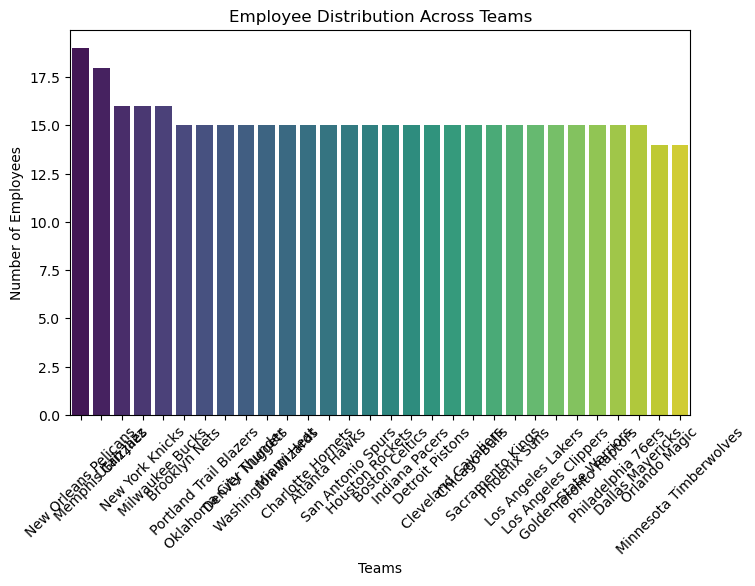

In [22]:
# Visualization 1: Team Distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=team_counts.index, y=team_counts.values, hue=None, palette='viridis', legend=False)
plt.xlabel("Teams")
plt.ylabel("Number of Employees")
plt.title("Employee Distribution Across Teams")
plt.xticks(rotation=45)
plt.show()

In [24]:
#  Segregation by Position
position_counts = df['Position'].value_counts()

C:\Users\wowbe\AppData\Local\Temp\ipykernel_18056\3092761396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_counts.index, y=position_counts.values, hue=None, palette='coolwarm', legend=False)


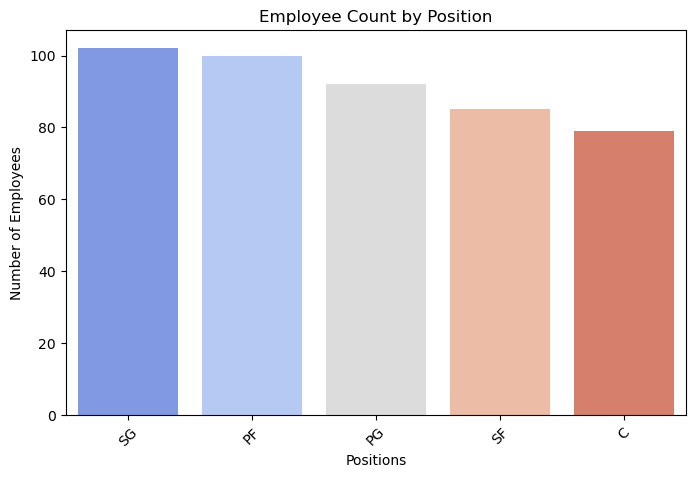

In [26]:
# Visualization 2: Position Segregation
plt.figure(figsize=(8, 5))
sns.barplot(x=position_counts.index, y=position_counts.values, hue=None, palette='coolwarm', legend=False)
plt.xlabel("Positions")
plt.ylabel("Number of Employees")
plt.title("Employee Count by Position")
plt.xticks(rotation=45)
plt.show()

In [28]:
# Predominant Age Group
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-30', '30-40', '40-50', '50-60']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
age_group_counts = df['Age_Group'].value_counts()

C:\Users\wowbe\AppData\Local\Temp\ipykernel_18056\1698656490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_counts.index, y=age_group_counts.values, hue=None, palette='magma', legend=False)


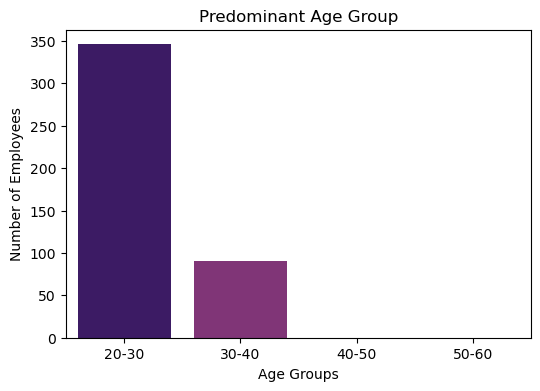

In [30]:
# Visualization 3: Age Group Distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, hue=None, palette='magma', legend=False)
plt.xlabel("Age Groups")
plt.ylabel("Number of Employees")
plt.title("Predominant Age Group")
plt.show()

In [32]:
#Highest Salary Expenditure (by team and position)
team_salary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
position_salary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

C:\Users\wowbe\AppData\Local\Temp\ipykernel_18056\3448439873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_salary.index, y=team_salary.values, ax=axes[0], palette='Blues')
C:\Users\wowbe\AppData\Local\Temp\ipykernel_18056\3448439873.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=position_salary.index, y=position_salary.values, ax=axes[1], palette='Reds')


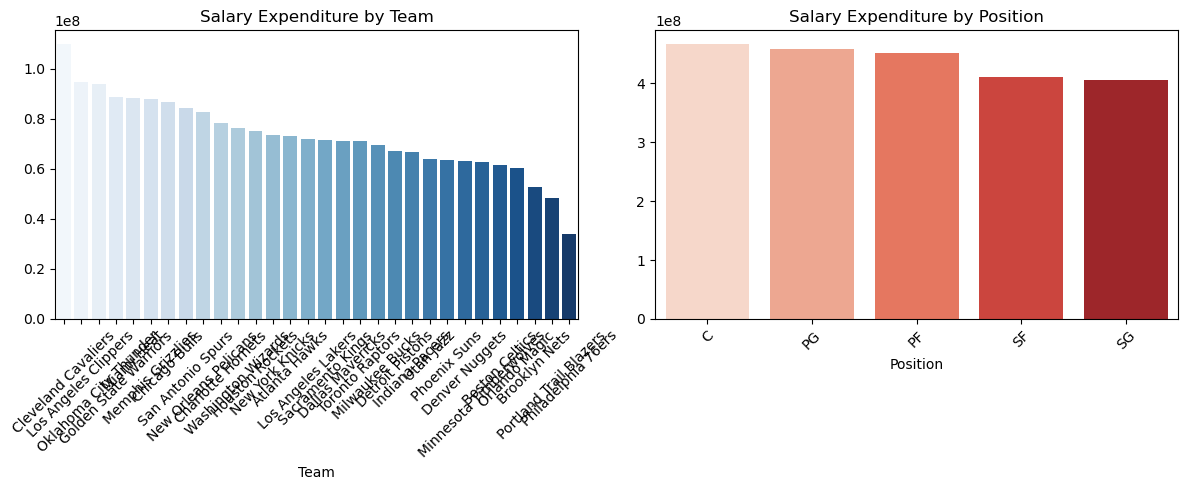

In [36]:
# Visualization 4: Salary Expenditure by Team & Position
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=team_salary.index, y=team_salary.values, ax=axes[0], palette='Blues')
axes[0].set_title("Salary Expenditure by Team")
axes[0].set_xticks(range(len(team_salary.index)))
axes[0].set_xticklabels(team_salary.index, rotation=45)

sns.barplot(x=position_salary.index, y=position_salary.values, ax=axes[1], palette='Reds')
axes[1].set_title("Salary Expenditure by Position")
axes[1].set_xticks(range(len(position_salary.index)))
axes[1].set_xticklabels(position_salary.index, rotation=45)

plt.tight_layout()
plt.show()

In [38]:
#Correlation Between Age and Salary
correlation = df[['Age', 'Salary']].corr()

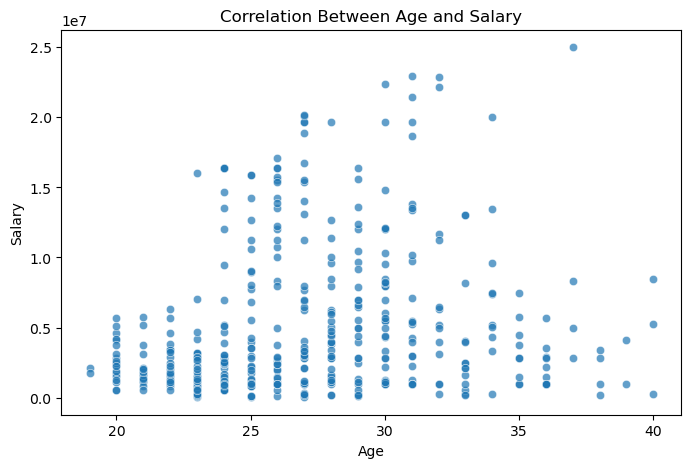

In [40]:
# Visualization 5: Age vs Salary Scatter Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Age'], y=df['Salary'], alpha=0.7)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Correlation Between Age and Salary")
plt.show()